# Most Profitable Studios Analysis

## Recommendation

    <insert> What recommendation I'll make for Microsoft's new movie studio. 


## Step 1: 
Importing necessary tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Step 1.1: 
Reading in the data

In [2]:
df = pd.read_csv('tmdb.movies.csv', index_col=0)
df1 = pd.read_csv('bom.movie_gross.csv')

In [3]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Step 2: 
Examining our dataframes above, we can see that they both have a column for title

In [5]:
df_merge = pd.merge(df, df1, on='title')

#Create new dataframe the columns we want 
new_df = df_merge[['title', 'year', 'studio', 'popularity', 'domestic_gross', 'foreign_gross']].sort_values(by='year', ascending=False)
new_df

,title,year,studio,popularity,domestic_gross,foreign_gross
2702,Last Letter,2018,CL,0.600,181000.0,NaN
2555,Mortal Engines,2018,Uni.,40.095,16000000.0,67700000
2566,Ready Player One,2018,WB,30.029,137700000.0,445200000
2565,Mary Poppins Returns,2018,BV,30.419,172000000.0,177600000
2564,The Meg,2018,WB,31.397,145400000.0,384800000
...,...,...,...,...,...,...
166,Somewhere,2010,Focus,7.596,1800000.0,12200000
164,MacGruber,2010,Uni.,7.666,8500000.0,797000
163,The Romantics,2010,FOAK,7.676,107000.0,17300
162,The Red Baron,2010,Mont.,7.676,37200.0,3100


## Step 3: 
Add foreign and domestic profits together to get an international picture of how much each movie has made. 

In [6]:
# convert the domestic gross column to a numeric column so it can be added to the foreign gross column
new_df['domestic_gross'] = pd.to_numeric(new_df['domestic_gross'])
new_df['domestic_gross'] = new_df['domestic_gross'].fillna(0)

# remove commas from foreign gross and convert to a numeric column
new_df['foreign_gross'].replace(',','', regex=True, inplace=True)
new_df['foreign_gross'] = pd.to_numeric(new_df['foreign_gross'])
new_df['foreign_gross'] = new_df['foreign_gross'].fillna(0)

# create a new column adding the domestic and foreign gross values together to show each title's total gross 
new_df['total_gross'] = new_df['domestic_gross'] + new_df['foreign_gross']
new_df[['title', 'year', 'studio', 'total_gross']]

#Limit results to only the past 10 years (2011)
new_df = new_df.loc[new_df['year'] >= 2011] 
new_df

,title,year,studio,popularity,domestic_gross,foreign_gross,total_gross
2702,Last Letter,2018,CL,0.600,181000.0,0.0,181000.0
2555,Mortal Engines,2018,Uni.,40.095,16000000.0,67700000.0,83700000.0
2566,Ready Player One,2018,WB,30.029,137700000.0,445200000.0,582900000.0
2565,Mary Poppins Returns,2018,BV,30.419,172000000.0,177600000.0,349600000.0
2564,The Meg,2018,WB,31.397,145400000.0,384800000.0,530200000.0
...,...,...,...,...,...,...,...
518,Prom,2011,BV,6.911,10100000.0,0.0,10100000.0
480,The Son of No One,2011,Anch.,7.586,30700.0,0.0,30700.0
474,Vanishing on 7th Street,2011,Magn.,7.719,22700.0,1000000.0,1022700.0
481,Puncture,2011,MNE,7.578,68900.0,0.0,68900.0


## Step 4: 
Order our new dataframe by total_gross to view the top grossing films of the last ten years. 

In [7]:
new_df = new_df.sort_values(by='total_gross', ascending=False)
new_df[['title', 'studio', 'total_gross', 'year', 'popularity']]

,title,studio,total_gross,year,popularity
1622,Avengers: Age of Ultron,BV,1.405400e+09,2015,44.383
608,Black Panther,BV,1.347000e+09,2018,2.058
609,Black Panther,BV,1.347000e+09,2018,44.140
2320,Star Wars: The Last Jedi,BV,1.332600e+09,2017,34.293
2319,Star Wars: The Last Jedi,BV,1.332600e+09,2017,34.293
...,...,...,...,...,...
1132,Into the White,Magn.,7.000000e+02,2013,7.072
555,Death of a Superhero,Trib.,6.000000e+02,2012,5.158
2423,2:22,Magn.,4.000000e+02,2017,11.316
2251,Satanic,Magn.,3.000000e+02,2016,6.403


In [8]:
# Something to keep in mind is that Disney acquired 21st Century Fox in 2019. The data here from Fox shows movies
# that were made before 2019, so they are still considered to be made by Fox. 


# Visualizations:

## Studios that produced the most profitable movies

Text(0, 0.5, 'Gross in Billions')

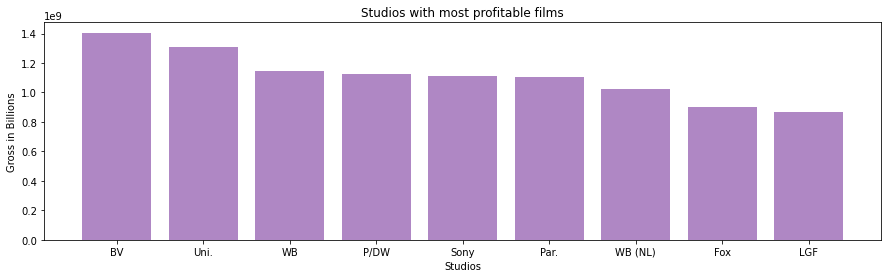

In [9]:
top_studios = new_df['studio'].head(40)
top_40_gross = new_df['total_gross'].head(40)

fig, ax = plt.subplots(figsize=(15, 4))

ax.bar(x=top_studios, height=top_40_gross, color='#af87c4')

ax.set_title('Studios with most profitable films')
ax.set_xlabel('Studios')
ax.set_ylabel('Gross in Billions')


## Note: 
Full names for studios represented here are as follows: 

BV = Disney 

WB = Warner Brothers

Uni. = Universal Studios

Sony = Sony

Fox = Fox

WB (NL) = Warner Brothers Netherlands

Par. = Paramount Pictures 

P/DW = Paramount Pictures / DreamWorks

LGF = Lionsgate Films

LG/S = Lionsgate / Summit Entertainment 

HC = China Film Group

10 studios that made the top 40 most profitable films in the last 10 years (foreign and domestic gross)

## Show which studios grossed the most money in the past 10 years
    Likely using .pivot method

In [10]:
#Create a dataframe that shows the total amount that each studio grossed from all of their movies in the last 10 years
studio_totals = new_df.pivot_table(index=new_df.index, values='total_gross', columns='studio')
studio_totals

studio,A23,A24,ADC,AF,ALP,AM,AR,ATO,AZ,Abk.,...,W/Dim.,WAMCR,WB,WB (NL),WGUSA,WHE,Wein.,XL,Yash,Zeit.
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Show the sums of the total_gross for each studio
studio_totals.sum(0)

studio
A23      1.642000e+05
A24      7.231136e+08
ADC      2.684000e+05
AF       1.113000e+06
ALP      2.800000e+03
             ...     
WHE      8.916200e+07
Wein.    3.359833e+09
XL       1.170000e+05
Yash     9.154860e+07
Zeit.    7.574200e+06
Length: 182, dtype: float64

In [12]:
#find the average of all of the studios total profits 
list_studio_values = list(studio_totals.sum(0))
list_studio_index = list(studio_totals.sum(0).index)
avg_list_studio_values = sum(list_studio_values) / len(list_studio_values)

#I make a dictionary of the dataframe from studio_totals to create a new 
x = dict(studio_totals.sum(0))
keys_list = list(x.keys())
values_list = list(x.values())

#I want the values in my plot to be above 942,910,276.00 which is the average of total profit for every studio.  
x1 = dict((k, v) for k, v in x.items() if v >= 942910276.7205882) 

#Now I want to sort my values from greatest to least
x2 = {k: v for k, v in sorted(x1.items(), key=lambda item: item[1], reverse=True)}
x2

{'BV': 46440514631.7,
 'Fox': 30095166596.0,
 'Uni.': 27890183191.4,
 'WB': 24012620999.0,
 'Sony': 18114886498.0,
 'Par.': 16730279696.0,
 'WB (NL)': 10508699999.0,
 'LGF': 8426402400.0,
 'LG/S': 4496523999.0,
 'P/DW': 3420300000.0,
 'Wein.': 3359832697.0,
 'Focus': 2513440000.0,
 'FoxS': 2404889300.0,
 'SGem': 1993187000.0,
 'WGUSA': 1828468400.0,
 'STX': 1733600000.0,
 'TriS': 1711315000.0,
 'Rela.': 1679894000.0,
 'ORF': 1421526999.0,
 'SPC': 1210278399.0}

Text(0, 0.5, 'Gross in Billions')

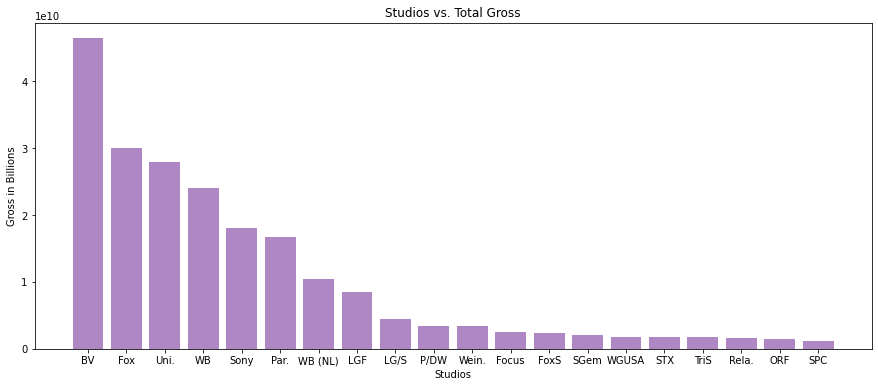

In [13]:
#I'll get my x axis from the keys in the dictionary and my height from the values in the dictionary 

x2_keys = list(x2.keys())
x2_values = list(x2.values())

x=x2_keys
height=x2_values

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x, height, color='#af87c4')

ax.set_title('Studios vs. Total Gross')
ax.set_xlabel('Studios')
ax.set_ylabel('Gross in Billions')

#Focus on ROI, in terms of partnering or taking a note from these companies
#look up top 5 studios and how much their budgets were, spend this much to be competitive with other movie studios 
#Other metrics to look into, come up with recommendation for movie, with certain budget, of a certain genre,
#with certain actors/actresses


## Step <i>: 
Let's look at the studios that made the most movies 

Text(0, 0.5, 'Number of Movies')

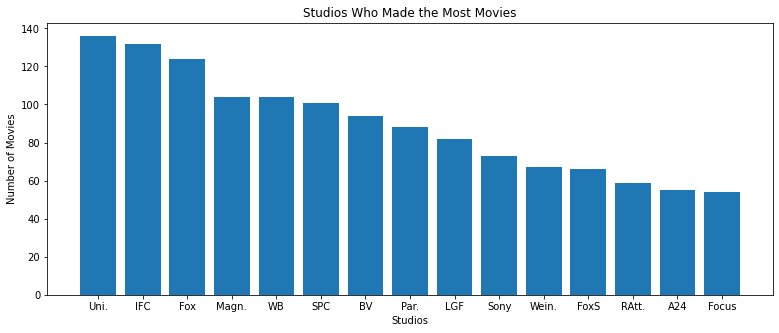

In [14]:
studio_counts = new_df['studio'].value_counts()
y = list(studio_counts.values)
x = list(studio_counts.index)

studio_counts
height = []
for i in y: 
    if i >= 50: 
        height.append(i)
height
len(height)

fig, ax = plt.subplots(figsize=(13,5))

ax.bar(x[0:15], height)

ax.set_title('Studios Who Made the Most Movies')
ax.set_xlabel('Studios')
ax.set_ylabel('Number of Movies')

## Step: 

Let's look at studios that make the most popular films. 

In [15]:
#sort our dataframe to see the most popular movies
popularity_df = new_df.sort_values(by='popularity', ascending=False)
popularity_df.head()

,title,year,studio,popularity,domestic_gross,foreign_gross,total_gross
2550,Avengers: Infinity War,2018,BV,80.773,678800000.0,1369.5,678801369.5
1296,John Wick,2014,LG/S,78.123,43000000.0,45700000.0,88700000.0
1297,The Hobbit: The Battle of the Five Armies,2014,WB (NL),53.783,255100000.0,700900000.0,956000000.0
1298,Guardians of the Galaxy,2014,BV,49.606,333200000.0,440200000.0,773400000.0
2312,Blade Runner 2049,2017,WB,48.571,92100000.0,167200000.0,259300000.0


In [16]:
#Top 50 most popular movies in the last 10 years 
popularity_df[['studio', 'title', 'popularity']].head(50)


,studio,title,popularity
2550,BV,Avengers: Infinity War,80.773
1296,LG/S,John Wick,78.123
1297,WB (NL),The Hobbit: The Battle of the Five Armies,53.783
1298,BV,Guardians of the Galaxy,49.606
2312,WB,Blade Runner 2049,48.571
2311,WB,Blade Runner 2049,48.571
2551,WB,Fantastic Beasts: The Crimes of Grindelwald,48.508
2552,BV,Ralph Breaks the Internet,48.057
2313,Sony,Spider-Man: Homecoming,46.775
2553,BV,Ant-Man and the Wasp,44.729
